In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors 
import matplotlib.cm as cmx
from random import randint
plt.rcParams.update(plt.rcParamsDefault)

In [2]:
dicentric_data = pd.read_csv('dicentric_formation_lit_data.csv')
print(dicentric_data.columns.tolist())
k2019_data = dicentric_data[dicentric_data['Paper'] == 'Kowalska 2019']
k2019_data
Bettega_data = dicentric_data[dicentric_data['Paper']=='Bettega 1981']
Bettega_data

['Paper', 'Cell type', 'Radiation type', 'Beam info', 'Energy (MeV)', 'Error in energy (MeV)', 'LET(keV/um)', 'Dose (Gy)', 'No. of cells scored', 'Dicentrics per cell', 'Dicentrics per 100 cells', 'Error in dicentrics', 'Plot Index']


,Paper,Cell type,Radiation type,Beam info,Energy (MeV),Error in energy (MeV),LET(keV/um),Dose (Gy),No. of cells scored,Dicentrics per cell,Dicentrics per 100 cells,Error in dicentrics,Plot Index
18,Bettega 1981,human EUE,Proton,NaN,31.0,0.3,1.83,0.0,565,0.00,0.0,0.0,3
19,Bettega 1981,human EUE,Proton,NaN,31.0,0.3,1.83,0.5,25,0.04,4.0,4.0,3
20,Bettega 1981,human EUE,Proton,NaN,31.0,0.3,1.83,1.0,171,0.08,8.0,2.0,3
21,Bettega 1981,human EUE,Proton,NaN,31.0,0.3,1.83,1.5,77,0.13,13.0,4.0,3
22,Bettega 1981,human EUE,Proton,NaN,31.0,0.3,1.83,2.0,210,0.20,20.0,10.0,3
23,Bettega 1981,human EUE,Proton,NaN,31.0,0.3,1.83,3.0,122,0.46,46.0,8.0,3
24,Bettega 1981,human EUE,Proton,NaN,31.0,0.3,1.83,5.0,97,0.90,90.0,10.0,3
25,Bettega 1981,human EUE,Proton,NaN,12.0,0.5,3.99,0.0,255,0.00,0.0,0.0,4
26,Bettega 1981,human EUE,Proton,NaN,12.0,0.5,3.99,0.5,202,0.06,6.0,3.0,4
27,Bettega 1981,human EUE,Proton,NaN,12.0,0.5,3.99,1.0,110,0.14,14.0,4.0,4


In [3]:
# remove George 2015 data
dicentric_data = dicentric_data[dicentric_data['Paper'] != 'George 2015']

In [10]:
marker_dict = {'Proton':'P','X-ray':'x','Gamma':'o','Carbon':'$c$'}
#marker_dict = {'Proton':'+','X-ray':'x','Gamma':'.','Carbon':'$C$'}
#paper_dict = {''}

def plot_by_paper(paper_title,data_pd):
    
    pd_paper = data_pd[data_pd['Paper']==paper_title]
    
    plot_indices = np.unique(pd_paper['Plot Index'].tolist())
    print(plot_indices)

    fig,ax = plt.subplots(figsize=(12,12))
    
    discrete = plt.get_cmap('tab10') 
    cNorm  = colors.Normalize(vmin=0, vmax=len(plot_indices))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=discrete)
    
    for j,i in enumerate(plot_indices):
        
        colorVal = scalarMap.to_rgba(j) 

        sub_pd = pd_paper[pd_paper['Plot Index'] == i]
        radiation_type = sub_pd['Radiation type'].iloc[0]
        energy = sub_pd['Energy (MeV)'].iloc[0]
        
        error = np.sqrt(sub_pd['Dicentrics per 100 cells']*sub_pd['No. of cells scored']/100)*(100/sub_pd['No. of cells scored'])
        plt.errorbar(x=sub_pd['Dose (Gy)'],y=sub_pd['Dicentrics per 100 cells'],yerr=error,c=colorVal)

        plt.plot(sub_pd['Dose (Gy)'], sub_pd['Dicentrics per 100 cells'], 
                 marker=marker_dict["{}".format(radiation_type)],
                 label="{} {} MeV".format(radiation_type,energy),c=colorVal)

    plt.legend()
    plt.xlabel('Dose, Gy')
    plt.ylabel('Dicentrics per 100 cells')
    plt.title('{}'.format(paper_title))
    
def plot_by_paper_and_radiation(paper_title, radiation_type, data_pd):
    
    pd_paper = data_pd[data_pd['Paper']==paper_title]
    pd_paper = pd_paper[pd_paper['Radiation type']==radiation_type]
    
    plot_indices = np.unique(pd_paper['Plot Index'].tolist())
    print(plot_indices)

    fig,ax = plt.subplots(figsize=(8,8))
    
    discrete = plt.get_cmap('tab10') 
    cNorm  = colors.Normalize(vmin=0, vmax=len(plot_indices))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=discrete)
    
    for j,i in enumerate(plot_indices):
        
        colorVal = scalarMap.to_rgba(j) 

        sub_pd = pd_paper[pd_paper['Plot Index'] == i]
        radiation_type = sub_pd['Radiation type'].iloc[0]
        energy = sub_pd['Energy (MeV)'].iloc[0]
        
        error = np.sqrt(sub_pd['Dicentrics per 100 cells']*sub_pd['No. of cells scored']/100)*(100/sub_pd['No. of cells scored'])
        plt.errorbar(x=sub_pd['Dose (Gy)'],y=sub_pd['Dicentrics per 100 cells'],yerr=error,c=colorVal)

        plt.plot(sub_pd['Dose (Gy)'], sub_pd['Dicentrics per 100 cells'], 
                 marker=marker_dict["{}".format(radiation_type)],
                 label="{} {} MeV".format(radiation_type,energy),c=colorVal)

    plt.legend()
    plt.xlabel('Dose, Gy')
    plt.ylabel('Dicentrics per 100 cells')
    plt.title('{}'.format(paper_title))
    
    return ax


In [46]:
marker_dict = {'Proton':'P','X-ray':'X','Gamma':'o','Carbon':'$c$'}
def plot_all_2(data_pd):
    
    plot_indices = np.unique(data_pd['Plot Index'].tolist())
    papers = np.unique(data_pd['Paper'].tolist())
#     fig,ax = plt.subplots(figsize=(12,12))
    fig,ax = plt.subplots()
    
    discrete = plt.get_cmap('tab10') 
    cNorm  = colors.Normalize(vmin=0, vmax=len(papers))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=discrete)
    
    for j,paper in enumerate(papers):
        paper_pd = data_pd[data_pd['Paper'] == paper]

        #rand_color = (np.random.uniform(),np.random.uniform(),np.random.uniform())
        colorVal = scalarMap.to_rgba(j)
        colorVal2 = scalarMap.to_rgba(j, 0.4)
        
        paper_text = paper.replace(" ","\ ")
        
        plot_indices = np.unique(paper_pd['Plot Index'].tolist())
        plt.plot([], [], ' ', label=r'$ \bf{{{p}}}$'.format(p=paper_text))
        
        marker_fc = [colorVal, colorVal2, 'None']
        fc_index = 0

        for i in plot_indices:

            sub_pd = paper_pd[paper_pd['Plot Index'] == i]
            
            radiation_type = sub_pd['Radiation type'].iloc[0]
            energy = sub_pd['Energy (MeV)'].iloc[0]


            #error = np.sqrt(sub_pd['Dicentrics per 100 cells']*sub_pd['No. of cells scored']/100)*(100/sub_pd['No. of cells scored'])
            error = np.sqrt(sub_pd['Dicentrics per cell']*sub_pd['No. of cells scored']) / sub_pd['No. of cells scored']
#             plt.errorbar(x=sub_pd['Dose (Gy)'],y=sub_pd['Dicentrics per 100 cells'],yerr=error,color=colorVal, ls='none')
            
#             plt.plot(sub_pd['Dose (Gy)'], sub_pd['Dicentrics per 100 cells'], 
#                     color=colorVal,marker=marker_dict["{}".format(radiation_type)],
#                     label="{} {:.3g} MeV".format(radiation_type,energy), ls='none')
#             plt.plot(sub_pd['Dose (Gy)'], sub_pd['Dicentrics per 100 cells'], 
#                     color=colorVal, ls='dotted', alpha=0.5)
            plt.errorbar(x=sub_pd['Dose (Gy)'],y=sub_pd['Dicentrics per cell'],yerr=error,color=colorVal, ls='none')
            
            plt.plot(sub_pd['Dose (Gy)'], sub_pd['Dicentrics per cell'], 
                    color=colorVal,marker=marker_dict["{}".format(radiation_type)], 
                    markeredgecolor=colorVal, 
                    markerfacecolor=marker_fc[fc_index],
                    label="{} {:.3g} MeV".format(radiation_type,energy), ls='none', ms=8)
            plt.plot(sub_pd['Dose (Gy)'], sub_pd['Dicentrics per cell'], 
                    color=colorVal, ls='dashed', alpha=0.4)
            fc_index += 1
            
    plt.legend(loc='center left',bbox_to_anchor=(1,0.5,0.5,0.0))
    plt.xlabel('Dose (Gy)', fontsize=12)
#     plt.ylabel('Dicentrics per 100 cells',fontsize=12)
    plt.ylabel('Dicentrics per cell',fontsize=12)
    #plt.title('Dicentrics vs Dose For all Literature',fontsize=15)

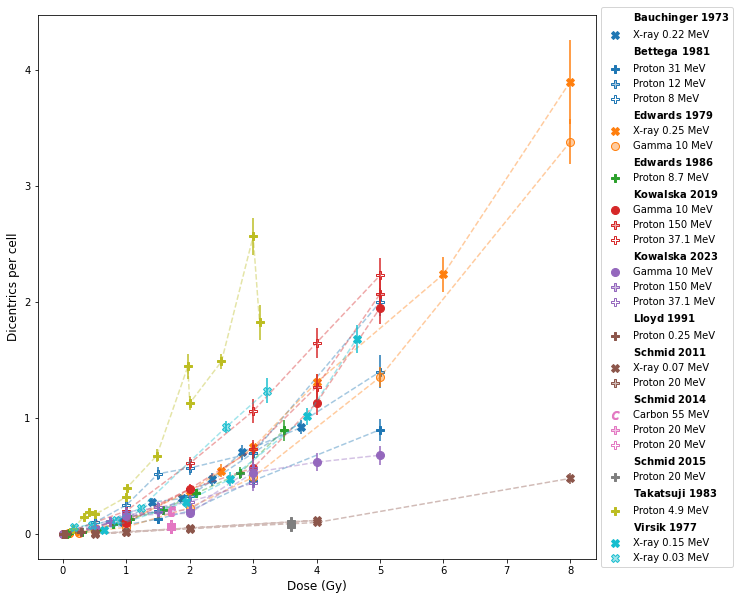

In [47]:
plt.rcParams["figure.figsize"] = (10,10)
plot_all_2(dicentric_data)
plt.savefig('')

In [ ]:
plot_by_paper('Bettega 1981',dicentric_data)

In [ ]:
test_df = pd.read_csv('output_files/Original_Parameters/Gamma_10MeV_1Gy/PerRepResults.out', sep=' ', header=None, skiprows=1)
print(test_df)
test_df.drop(test_df.columns[len(test_df.columns)-1], axis=1, inplace=True)
col_names_df = pd.read_csv('output_files/Original_Parameters/Gamma_10MeV_1Gy/PerRepResults.out', sep='|', nrows=0)
test_df = pd.DataFrame(data=test_df.values, columns=col_names_df.columns)
test_df

In [ ]:
dsbs = np.array(test_df['Initial DSBs '])

In [ ]:
dsbs

In [ ]:
doses = [1,2,3,4,5]
sim_dicentrics_gamma = np.array([])
sim_dicentrics_gamma_std = np.array([])
for d in doses:
    fname = 'Gamma_10MeV_{}Gy'.format(d)
    path = 'output_files/Original_Parameters/'+fname+'/PerRepResults.out'
    sim_df = pd.read_csv(path, sep=' ', header=None, skiprows=1)
    sim_df.drop(sim_df.columns[len(sim_df.columns)-1], axis=1, inplace=True)
    col_names_df = pd.read_csv(path, sep='|', nrows=0)
    sim_df = pd.DataFrame(data=sim_df.values, columns=col_names_df.columns)
    dicentrics = sim_df[' No. InterCosomeAb ']
    sim_dicentrics_gamma = np.append(sim_dicentrics_gamma, np.mean(dicentrics))
    sim_dicentrics_gamma_std = np.append(sim_dicentrics_gamma_std, np.std(dicentrics))

In [ ]:
plt.errorbar(doses, sim_dicentrics_gamma, yerr=sim_dicentrics_gamma_std)

In [ ]:
ax_gamma = plot_by_paper_and_radiation('Kowalska 2019', 'Gamma', dicentric_data)
ax_gamma.errorbar(doses, sim_dicentrics_gamma, yerr=sim_dicentrics_gamma_std, color='r', label='DaMaRiS original parameters')
D_values = [5,8,9,10,11,15]
for D in D_values:
    fname = 'Gamma_10MeV_3Gy'
    path = 'output_files/CTRWCoupled_DJump_2.808e{}/'.format(D)+fname+'/PerRepResults.out'
    sim_df = pd.read_csv(path, sep=' ', header=None, skiprows=1)
    sim_df.drop(sim_df.columns[len(sim_df.columns)-1], axis=1, inplace=True)
    col_names_df = pd.read_csv(path, sep='|', nrows=0)
    sim_df = pd.DataFrame(data=sim_df.values, columns=col_names_df.columns)
    dicentrics = sim_df[' No. InterCosomeAb ']
    mean = np.mean(dicentrics)
    std = np.std(dicentrics)
    ax_gamma.errorbar(3, mean, yerr=std, label='2.808e{}'.format(D), marker='x')
plt.legend()

In [ ]:
#plt.plot(k2019_data['Dose (Gy)'], k2019_data['Dicentrics per 100 cells'], marker='.', label='Co-60 Gamma')

def gen_labels():
    
    labels = np.array([])
    
    for i in np.arange(len(k2019_data.index)):
        
        labels = np.append(labels,("{} {} {}".format(k2019_data['Radiation type'].iloc[i],
                                   k2019_data['Beam info'].iloc[i],k2019_data['Energy (MeV)'].iloc[i])))
        
    return np.unique(labels)


marker_dict = {'Proton':'P','X-ray':'x','Gamma':'o' }

unique_labels = gen_labels()
print(unique_labels)

for i in np.arange(len(k2019_data.index)):
    
    radiation_type = k2019_data['Radiation type'].iloc[i]
    energy = k2019_data['Energy (MeV)'].iloc[i]
    
    plt.scatter(k2019_data['Dose (Gy)'], k2019_data['Dicentrics per 100 cells'], 
                marker=marker_dict[radiation_type], 
                label="{} {} MeV".format(radiation_type,energy))
    
plt.title(k2019_data['Paper'].iloc[0])
plt.legend()
    
    
    
#for i in np.arange(len(k2019_data.index)):
    
    

In [ ]:

plt.plot(pd_gamma.iloc[:,0], pd_gamma.iloc[:,2], marker='.', label='Co-60 Gamma')
plt.plot(pd_high_energy_protons.iloc[:,0], pd_high_energy_protons.iloc[:,2], marker='x', label='150 MeV protons')
plt.plot(pd_sobp_protons.iloc[:,0], pd_sobp_protons.iloc[:,2], marker='v', label='SOBP protons (37 MeV)')
plt.xlabel('Dose, Gy')
plt.ylabel('Dicentrics per 100 cells')
plt.title('Kowalska (2019)')
plt.legend()

## Scrap/Old Code


In [ ]:
pd_gamma = pd.read_csv(filenames[0])
pd_high_energy_protons = pd.read_csv(filenames[1])
pd_sobp_protons = pd.read_csv(filenames[2])

In [ ]:
filenames = ['kowalska_gamma.csv', 'kowalska_high_energy_protons.csv', 'kowalska_sobp_protons.csv']

In [ ]:
plt.plot(pd_gamma.iloc[:,0], pd_gamma.iloc[:,2], marker='.', label='Co-60 Gamma')
plt.plot(pd_high_energy_protons.iloc[:,0], pd_high_energy_protons.iloc[:,2], marker='x', label='150 MeV protons')
plt.plot(pd_sobp_protons.iloc[:,0], pd_sobp_protons.iloc[:,2], marker='v', label='SOBP protons (37 MeV)')
plt.xlabel('Dose, Gy')
plt.ylabel('Dicentrics per 100 cells')
plt.title('Kowalska (2019)')
plt.legend()